# Fannie Mae Loan Default Classifier
__________
## 2005 Q1

In [1]:
import pandas as pd
import numpy as np

In [2]:
fp = './data/acquisition_data_dict_summary.csv'
list_acq_col_names = pd.read_csv(fp)['Field Name'].tolist()

fp = './data/performance_data_dict_summary.csv'
list_perf_col_names = pd.read_csv(fp)['Field Name'].tolist()

In [3]:
fp = './data/2005Q1/Acquisition_2005Q1.txt'
df_acq = pd.read_csv(fp, sep='|', header=None, names=list_acq_col_names)
df_acq.head()

,LOAN IDENTIFIER,ORIGINATION CHANNEL,SELLER NAME,ORIGINAL INTEREST RATE,ORIGINAL UPB,ORIGINAL LOAN TERM,ORIGINATION DATE,FIRST PAYMENT DATE,ORIGINAL LOAN-TO-VALUE (LTV),ORIGINAL COMBINED LOAN-TO-VALUE (CLTV),...,PROPERTY TYPE,NUMBER OF UNITS,OCCUPANCY TYPE,PROPERTY STATE,ZIP CODE SHORT,PRIMARY MORTGAGE INSURANCE PERCENT,PRODUCT TYPE,CO-BORROWER CREDIT SCORE AT ORIGINATION,MORTGAGE INSURANCE TYPE,RELOCATION MORTGAGE INDICATOR
0,100000102115,C,"CITIMORTGAGE, INC.",4.500,95000,120,02/2005,04/2005,51,51.0,...,SF,1,P,TX,750,NaN,FRM,783.0,NaN,N
1,100001329224,B,"BANK OF AMERICA, N.A.",5.875,141000,360,12/2004,02/2005,78,78.0,...,SF,1,P,IL,606,NaN,FRM,733.0,NaN,N
2,100004036273,C,"BANK OF AMERICA, N.A.",6.625,139000,360,01/2005,03/2005,95,95.0,...,SF,1,S,FL,349,30.0,FRM,NaN,1.0,N
3,100004945019,R,"BANK OF AMERICA, N.A.",5.875,104000,360,12/2004,02/2005,68,68.0,...,PU,1,P,SC,295,NaN,FRM,NaN,NaN,N
4,100013634177,C,"CITIMORTGAGE, INC.",6.250,51000,240,12/2004,02/2005,69,69.0,...,SF,1,P,WI,544,NaN,FRM,NaN,NaN,N


In [4]:
fp = './data/2005Q1/Performance_2005Q1.txt'
df_perf = pd.read_csv(fp, sep='|', header=None, names=list_perf_col_names)
df_perf.head()

,LOAN IDENTIFIER,MONTHLY REPORTING PERIOD,SERVICER NAME,CURRENT INTEREST RATE,CURRENT ACTUAL UPB,LOAN AGE,REMAINING MONTHS TO LEGAL MATURITY,ADJUSTED MONTHS TO MATURITY,MATURITY DATE,METROPOLITAN STATISTICAL AREA (MSA),...,ASSOCIATED TAXES FOR HOLDING PROPERTY,NET SALE PROCEEDS,CREDIT ENHANCEMENT PROCEEDS,REPURCHASE MAKE WHOLE PROCEEDS,OTHER FORECLOSURE PROCEEDS,NON INTEREST BEARING UPB,PRINCIPAL FORGIVENESS AMOUNT,REPURCHASE MAKE WHOLE PROCEEDS FLAG,FORECLOSURE PRINCIPAL WRITE-OFF AMOUNT,SERVICING ACTIVITY INDICATOR
0,100000102115,03/01/2005,"CITIMORTGAGE ASSET MANAGEMENT, INC.",4.5,NaN,0,120,119.0,03/2015,43300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100000102115,04/01/2005,NaN,4.5,NaN,1,119,118.0,03/2015,43300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100000102115,05/01/2005,NaN,4.5,NaN,2,118,117.0,03/2015,43300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100000102115,06/01/2005,NaN,4.5,NaN,3,117,116.0,03/2015,43300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100000102115,07/01/2005,NaN,4.5,NaN,4,116,115.0,03/2015,43300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_acq.shape, df_perf.shape

((303621, 25), (23288993, 31))

In [6]:
df_perf['LOAN IDENTIFIER'].unique()[0:10]

array([100000102115, 100001329224, 100004036273, 100004945019,
       100013634177, 100014052527, 100014432938, 100018354907,
       100018573876, 100020383977], dtype=int64)

In [7]:
df_perf[df_perf['LOAN IDENTIFIER'] == 100004945019].iloc[:,0:10]

,LOAN IDENTIFIER,MONTHLY REPORTING PERIOD,SERVICER NAME,CURRENT INTEREST RATE,CURRENT ACTUAL UPB,LOAN AGE,REMAINING MONTHS TO LEGAL MATURITY,ADJUSTED MONTHS TO MATURITY,MATURITY DATE,METROPOLITAN STATISTICAL AREA (MSA)
210,100004945019,01/01/2005,"BANK OF AMERICA, N.A.",5.875,NaN,0,360,360.0,01/2035,34820
211,100004945019,02/01/2005,NaN,5.875,NaN,1,359,359.0,01/2035,34820
212,100004945019,03/01/2005,NaN,5.875,NaN,2,358,358.0,01/2035,34820
213,100004945019,04/01/2005,NaN,5.875,NaN,3,357,357.0,01/2035,34820
214,100004945019,05/01/2005,NaN,5.875,NaN,4,356,356.0,01/2035,34820
215,100004945019,06/01/2005,NaN,5.875,NaN,5,355,355.0,01/2035,34820
216,100004945019,07/01/2005,NaN,5.875,103157.19,6,354,354.0,01/2035,34820
217,100004945019,08/01/2005,NaN,5.875,103048.21,7,353,353.0,01/2035,34820
218,100004945019,09/01/2005,NaN,5.875,102938.70,8,352,352.0,01/2035,34820
219,100004945019,10/01/2005,NaN,5.875,102828.65,9,351,351.0,01/2035,34820


In [8]:
df_perf[df_perf['CURRENT LOAN DELINQUENCY STATUS'] == '3']

,LOAN IDENTIFIER,MONTHLY REPORTING PERIOD,SERVICER NAME,CURRENT INTEREST RATE,CURRENT ACTUAL UPB,LOAN AGE,REMAINING MONTHS TO LEGAL MATURITY,ADJUSTED MONTHS TO MATURITY,MATURITY DATE,METROPOLITAN STATISTICAL AREA (MSA),...,ASSOCIATED TAXES FOR HOLDING PROPERTY,NET SALE PROCEEDS,CREDIT ENHANCEMENT PROCEEDS,REPURCHASE MAKE WHOLE PROCEEDS,OTHER FORECLOSURE PROCEEDS,NON INTEREST BEARING UPB,PRINCIPAL FORGIVENESS AMOUNT,REPURCHASE MAKE WHOLE PROCEEDS FLAG,FORECLOSURE PRINCIPAL WRITE-OFF AMOUNT,SERVICING ACTIVITY INDICATOR
420,100013634177,12/01/2008,NaN,6.250,45620.13,47,193,196.0,01/2025,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
433,100013634177,01/01/2010,NaN,6.250,43753.74,60,180,182.0,01/2025,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
434,100013634177,02/01/2010,NaN,6.250,43608.85,61,179,181.0,01/2025,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
444,100013634177,12/01/2010,NaN,6.250,42034.81,71,169,171.0,01/2025,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
458,100013634177,02/01/2012,NaN,6.250,39806.60,85,155,157.0,01/2025,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
459,100013634177,03/01/2012,NaN,6.250,39641.16,86,154,156.0,01/2025,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
460,100013634177,04/01/2012,NaN,6.250,39474.85,87,153,155.0,01/2025,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
483,100013634177,03/01/2014,NaN,6.250,35401.39,110,130,132.0,01/2025,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
484,100013634177,04/01/2014,NaN,6.250,35213.00,111,129,131.0,01/2025,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
485,100013634177,05/01/2014,NaN,6.250,35023.63,112,128,130.0,01/2025,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [9]:
df_perf[df_perf['LOAN IDENTIFIER'] == 100013634177].iloc[80:,10:20]

,CURRENT LOAN DELINQUENCY STATUS,MODIFICATION FLAG,ZERO BALANCE CODE,ZERO BALANCE EFFECTIVE DATE,LAST PAID INSTALLMENT DATE,FORECLOSURE DATE,DISPOSITION DATE,FORECLOSURE COSTS,PROPERTY PRESERVATION AND REPAIR COSTS,ASSET RECOVERY COSTS
455,1,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
456,2,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
457,2,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
458,3,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
459,3,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460,3,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
461,1,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
462,1,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
463,1,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
464,1,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_perf.isna().sum()

LOAN IDENTIFIER                                      0
MONTHLY REPORTING PERIOD                             0
SERVICER NAME                                 22716526
CURRENT INTEREST RATE                                0
CURRENT ACTUAL UPB                             1797191
LOAN AGE                                             0
REMAINING MONTHS TO LEGAL MATURITY                   0
ADJUSTED MONTHS TO MATURITY                     648976
MATURITY DATE                                        0
METROPOLITAN STATISTICAL AREA (MSA)                  0
CURRENT LOAN DELINQUENCY STATUS                  12325
MODIFICATION FLAG                                    0
ZERO BALANCE CODE                             23016676
ZERO BALANCE EFFECTIVE DATE                   23016676
LAST PAID INSTALLMENT DATE                    23276668
FORECLOSURE DATE                              23277275
DISPOSITION DATE                              23276890
FORECLOSURE COSTS                             23277129
PROPERTY P

In [11]:
list_acq_col_names

['LOAN IDENTIFIER',
 'ORIGINATION CHANNEL',
 'SELLER NAME',
 'ORIGINAL INTEREST RATE',
 'ORIGINAL UPB',
 'ORIGINAL LOAN TERM',
 'ORIGINATION DATE',
 'FIRST PAYMENT DATE',
 'ORIGINAL LOAN-TO-VALUE (LTV)',
 'ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)',
 'NUMBER OF BORROWERS',
 'ORIGINAL DEBT TO INCOME RATIO',
 'BORROWER CREDIT SCORE AT ORIGINATION',
 'FIRST TIME HOME BUYER INDICATOR',
 'LOAN PURPOSE',
 'PROPERTY TYPE',
 'NUMBER OF UNITS',
 'OCCUPANCY TYPE',
 'PROPERTY STATE',
 'ZIP CODE SHORT',
 'PRIMARY MORTGAGE INSURANCE PERCENT',
 'PRODUCT TYPE',
 'CO-BORROWER CREDIT SCORE AT ORIGINATION',
 'MORTGAGE INSURANCE TYPE',
 'RELOCATION MORTGAGE INDICATOR']

In [12]:
list_perf_col_names

['LOAN IDENTIFIER',
 'MONTHLY REPORTING PERIOD',
 'SERVICER NAME',
 'CURRENT INTEREST RATE',
 'CURRENT ACTUAL UPB',
 'LOAN AGE',
 'REMAINING MONTHS TO LEGAL MATURITY',
 'ADJUSTED MONTHS TO MATURITY',
 'MATURITY DATE',
 'METROPOLITAN STATISTICAL AREA (MSA)',
 'CURRENT LOAN DELINQUENCY STATUS',
 'MODIFICATION FLAG',
 'ZERO BALANCE CODE',
 'ZERO BALANCE EFFECTIVE DATE',
 'LAST PAID INSTALLMENT DATE',
 'FORECLOSURE DATE',
 'DISPOSITION DATE',
 'FORECLOSURE COSTS',
 'PROPERTY PRESERVATION AND REPAIR COSTS',
 'ASSET RECOVERY COSTS',
 'MISCELLANEOUS HOLDING EXPENSES AND CREDITS',
 'ASSOCIATED TAXES FOR HOLDING PROPERTY',
 'NET SALE PROCEEDS',
 'CREDIT ENHANCEMENT PROCEEDS',
 'REPURCHASE MAKE WHOLE PROCEEDS',
 'OTHER FORECLOSURE PROCEEDS',
 'NON INTEREST BEARING UPB',
 'PRINCIPAL FORGIVENESS AMOUNT',
 'REPURCHASE MAKE WHOLE PROCEEDS FLAG',
 'FORECLOSURE PRINCIPAL WRITE-OFF AMOUNT',
 'SERVICING ACTIVITY INDICATOR']

In [13]:
df_perf['FORECLOSURE DATE'].unique()

array([nan, '11/01/2013', '07/01/2016', '12/01/2012', '01/01/2018',
       '04/01/2016', '09/01/2011', '01/01/2012', '03/01/2013',
       '02/01/2009', '08/01/2013', '02/01/2006', '08/01/2012',
       '12/01/2013', '12/01/2011', '07/01/2011', '07/01/2012',
       '06/01/2013', '09/01/2010', '07/01/2013', '03/01/2011',
       '07/01/2017', '06/01/2009', '04/01/2015', '02/01/2013',
       '07/01/2015', '03/01/2008', '01/01/2011', '05/01/2017',
       '11/01/2009', '05/01/2014', '09/01/2012', '08/01/2011',
       '03/01/2012', '03/01/2010', '10/01/2010', '10/01/2013',
       '09/01/2015', '02/01/2012', '10/01/2012', '11/01/2014',
       '01/01/2008', '11/01/2011', '10/01/2015', '09/01/2006',
       '06/01/2012', '08/01/2010', '01/01/2010', '01/01/2013',
       '04/01/2011', '07/01/2006', '06/01/2011', '02/01/2015',
       '02/01/2011', '07/01/2018', '09/01/2014', '04/01/2008',
       '08/01/2006', '06/01/2014', '09/01/2013', '05/01/2010',
       '07/01/2014', '03/01/2015', '01/01/2015', '

In [14]:
df_perf[df_perf['FORECLOSURE DATE'] == '11/01/2013'].head()

,LOAN IDENTIFIER,MONTHLY REPORTING PERIOD,SERVICER NAME,CURRENT INTEREST RATE,CURRENT ACTUAL UPB,LOAN AGE,REMAINING MONTHS TO LEGAL MATURITY,ADJUSTED MONTHS TO MATURITY,MATURITY DATE,METROPOLITAN STATISTICAL AREA (MSA),...,ASSOCIATED TAXES FOR HOLDING PROPERTY,NET SALE PROCEEDS,CREDIT ENHANCEMENT PROCEEDS,REPURCHASE MAKE WHOLE PROCEEDS,OTHER FORECLOSURE PROCEEDS,NON INTEREST BEARING UPB,PRINCIPAL FORGIVENESS AMOUNT,REPURCHASE MAKE WHOLE PROCEEDS FLAG,FORECLOSURE PRINCIPAL WRITE-OFF AMOUNT,SERVICING ACTIVITY INDICATOR
3526,100131033365,11/01/2013,NaN,6.000,308873.44,105,255,0.0,02/2035,41980,...,2900.60,135848.95,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN
260908,110027167262,11/01/2013,NaN,5.875,54424.10,106,254,0.0,01/2035,19820,...,8159.92,53155.47,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN
272367,110438893515,03/01/2014,NaN,5.000,223144.90,109,71,0.0,02/2020,24860,...,6039.84,544366.50,NaN,NaN,628.57,NaN,NaN,N,NaN,NaN
300424,111453134008,11/01/2013,NaN,5.750,140175.06,105,255,0.0,02/2035,19660,...,8357.10,154561.15,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN
996288,138079737507,11/01/2013,NaN,5.000,237306.94,109,251,0.0,10/2034,37980,...,12313.73,311279.24,NaN,NaN,3972.67,NaN,NaN,N,NaN,NaN


In [15]:
df_perf[df_perf['LOAN IDENTIFIER'] == 100131033365].iloc[:,0:16]

,LOAN IDENTIFIER,MONTHLY REPORTING PERIOD,SERVICER NAME,CURRENT INTEREST RATE,CURRENT ACTUAL UPB,LOAN AGE,REMAINING MONTHS TO LEGAL MATURITY,ADJUSTED MONTHS TO MATURITY,MATURITY DATE,METROPOLITAN STATISTICAL AREA (MSA),CURRENT LOAN DELINQUENCY STATUS,MODIFICATION FLAG,ZERO BALANCE CODE,ZERO BALANCE EFFECTIVE DATE,LAST PAID INSTALLMENT DATE,FORECLOSURE DATE
3421,100131033365,02/01/2005,OTHER,6.0,NaN,0,360,360.0,02/2035,41980,0,N,NaN,NaN,NaN,NaN
3422,100131033365,03/01/2005,NaN,6.0,NaN,1,359,359.0,02/2035,41980,0,N,NaN,NaN,NaN,NaN
3423,100131033365,04/01/2005,NaN,6.0,NaN,2,358,358.0,02/2035,41980,0,N,NaN,NaN,NaN,NaN
3424,100131033365,05/01/2005,NaN,6.0,NaN,3,357,357.0,02/2035,41980,0,N,NaN,NaN,NaN,NaN
3425,100131033365,06/01/2005,NaN,6.0,NaN,4,356,356.0,02/2035,41980,0,N,NaN,NaN,NaN,NaN
3426,100131033365,07/01/2005,NaN,6.0,NaN,5,355,355.0,02/2035,41980,0,N,NaN,NaN,NaN,NaN
3427,100131033365,08/01/2005,NaN,6.0,347883.12,6,354,354.0,02/2035,41980,0,N,NaN,NaN,NaN,NaN
3428,100131033365,09/01/2005,NaN,6.0,347524.11,7,353,353.0,02/2035,41980,0,N,NaN,NaN,NaN,NaN
3429,100131033365,10/01/2005,NaN,6.0,347163.30,8,352,352.0,02/2035,41980,0,N,NaN,NaN,NaN,NaN
3430,100131033365,11/01/2005,NaN,6.0,346800.69,9,351,351.0,02/2035,41980,0,N,NaN,NaN,NaN,NaN


In [16]:
df_perf[df_perf['LOAN IDENTIFIER'] == 100000102115].iloc[:,0:16]

,LOAN IDENTIFIER,MONTHLY REPORTING PERIOD,SERVICER NAME,CURRENT INTEREST RATE,CURRENT ACTUAL UPB,LOAN AGE,REMAINING MONTHS TO LEGAL MATURITY,ADJUSTED MONTHS TO MATURITY,MATURITY DATE,METROPOLITAN STATISTICAL AREA (MSA),CURRENT LOAN DELINQUENCY STATUS,MODIFICATION FLAG,ZERO BALANCE CODE,ZERO BALANCE EFFECTIVE DATE,LAST PAID INSTALLMENT DATE,FORECLOSURE DATE
0,100000102115,03/01/2005,"CITIMORTGAGE ASSET MANAGEMENT, INC.",4.5,NaN,0,120,119.0,03/2015,43300,0,N,NaN,NaN,NaN,NaN
1,100000102115,04/01/2005,NaN,4.5,NaN,1,119,118.0,03/2015,43300,0,N,NaN,NaN,NaN,NaN
2,100000102115,05/01/2005,NaN,4.5,NaN,2,118,117.0,03/2015,43300,0,N,NaN,NaN,NaN,NaN
3,100000102115,06/01/2005,NaN,4.5,NaN,3,117,116.0,03/2015,43300,0,N,NaN,NaN,NaN,NaN
4,100000102115,07/01/2005,NaN,4.5,NaN,4,116,115.0,03/2015,43300,0,N,NaN,NaN,NaN,NaN
5,100000102115,08/01/2005,NaN,4.5,NaN,5,115,114.0,03/2015,43300,0,N,NaN,NaN,NaN,NaN
6,100000102115,09/01/2005,NaN,4.5,90552.03,6,114,113.0,03/2015,43300,0,N,NaN,NaN,NaN,NaN
7,100000102115,10/01/2005,NaN,4.5,89907.04,7,113,112.0,03/2015,43300,0,N,NaN,NaN,NaN,NaN
8,100000102115,11/01/2005,NaN,4.5,89259.63,8,112,111.0,03/2015,43300,0,N,NaN,NaN,NaN,NaN
9,100000102115,12/01/2005,NaN,4.5,88609.79,9,111,110.0,03/2015,43300,0,N,NaN,NaN,NaN,NaN


In [17]:
df_perf[df_perf['REMAINING MONTHS TO LEGAL MATURITY'] == 30].head(10)

,LOAN IDENTIFIER,MONTHLY REPORTING PERIOD,SERVICER NAME,CURRENT INTEREST RATE,CURRENT ACTUAL UPB,LOAN AGE,REMAINING MONTHS TO LEGAL MATURITY,ADJUSTED MONTHS TO MATURITY,MATURITY DATE,METROPOLITAN STATISTICAL AREA (MSA),...,ASSOCIATED TAXES FOR HOLDING PROPERTY,NET SALE PROCEEDS,CREDIT ENHANCEMENT PROCEEDS,REPURCHASE MAKE WHOLE PROCEEDS,OTHER FORECLOSURE PROCEEDS,NON INTEREST BEARING UPB,PRINCIPAL FORGIVENESS AMOUNT,REPURCHASE MAKE WHOLE PROCEEDS FLAG,FORECLOSURE PRINCIPAL WRITE-OFF AMOUNT,SERVICING ACTIVITY INDICATOR
1401,100046321284,07/01/2015,NaN,5.500,18012.22,128,30,25.0,01/2018,30620,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1579,100047317294,08/01/2017,NaN,5.375,16233.75,150,30,30.0,02/2020,47900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2918,100098454069,06/01/2017,NaN,5.500,12645.84,150,30,22.0,12/2019,23420,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3677,100135495866,07/01/2017,NaN,5.625,19538.51,150,30,30.0,01/2020,22420,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
5044,100194956789,08/01/2017,NaN,4.875,29656.17,150,30,28.0,02/2020,45300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
9382,100353294374,09/01/2012,NaN,5.500,26951.75,90,30,30.0,03/2015,41180,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
9502,100358292931,07/01/2012,NaN,5.125,4686.78,90,30,16.0,01/2015,22220,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
14529,100561006690,07/01/2017,NaN,5.750,13882.60,150,30,30.0,01/2020,31420,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
14931,100573381311,07/01/2017,NaN,4.875,17220.71,150,30,28.0,01/2020,37980,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
16613,100638148702,08/01/2017,NaN,5.375,7144.63,150,30,28.0,02/2020,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [18]:
df_perf[df_perf['LOAN IDENTIFIER'] == 100561006690].iloc[:,0:16]

,LOAN IDENTIFIER,MONTHLY REPORTING PERIOD,SERVICER NAME,CURRENT INTEREST RATE,CURRENT ACTUAL UPB,LOAN AGE,REMAINING MONTHS TO LEGAL MATURITY,ADJUSTED MONTHS TO MATURITY,MATURITY DATE,METROPOLITAN STATISTICAL AREA (MSA),CURRENT LOAN DELINQUENCY STATUS,MODIFICATION FLAG,ZERO BALANCE CODE,ZERO BALANCE EFFECTIVE DATE,LAST PAID INSTALLMENT DATE,FORECLOSURE DATE
14379,100561006690,01/01/2005,"CITIMORTGAGE ASSET MANAGEMENT, INC.",5.75,NaN,0,180,180.0,01/2020,31420,0,N,NaN,NaN,NaN,NaN
14380,100561006690,02/01/2005,NaN,5.75,NaN,1,179,180.0,01/2020,31420,1,N,NaN,NaN,NaN,NaN
14381,100561006690,03/01/2005,NaN,5.75,NaN,2,178,178.0,01/2020,31420,0,N,NaN,NaN,NaN,NaN
14382,100561006690,04/01/2005,NaN,5.75,NaN,3,177,177.0,01/2020,31420,0,N,NaN,NaN,NaN,NaN
14383,100561006690,05/01/2005,NaN,5.75,NaN,4,176,176.0,01/2020,31420,0,N,NaN,NaN,NaN,NaN
14384,100561006690,06/01/2005,NaN,5.75,NaN,5,175,175.0,01/2020,31420,0,N,NaN,NaN,NaN,NaN
14385,100561006690,07/01/2005,NaN,5.75,58716.45,6,174,174.0,01/2020,31420,0,N,NaN,NaN,NaN,NaN
14386,100561006690,08/01/2005,NaN,5.75,58499.55,7,173,173.0,01/2020,31420,0,N,NaN,NaN,NaN,NaN
14387,100561006690,09/01/2005,NaN,5.75,58281.61,8,172,172.0,01/2020,31420,0,N,NaN,NaN,NaN,NaN
14388,100561006690,10/01/2005,NaN,5.75,58062.21,9,171,171.0,01/2020,31420,0,N,NaN,NaN,NaN,NaN


In [19]:
df_perf.head()

,LOAN IDENTIFIER,MONTHLY REPORTING PERIOD,SERVICER NAME,CURRENT INTEREST RATE,CURRENT ACTUAL UPB,LOAN AGE,REMAINING MONTHS TO LEGAL MATURITY,ADJUSTED MONTHS TO MATURITY,MATURITY DATE,METROPOLITAN STATISTICAL AREA (MSA),...,ASSOCIATED TAXES FOR HOLDING PROPERTY,NET SALE PROCEEDS,CREDIT ENHANCEMENT PROCEEDS,REPURCHASE MAKE WHOLE PROCEEDS,OTHER FORECLOSURE PROCEEDS,NON INTEREST BEARING UPB,PRINCIPAL FORGIVENESS AMOUNT,REPURCHASE MAKE WHOLE PROCEEDS FLAG,FORECLOSURE PRINCIPAL WRITE-OFF AMOUNT,SERVICING ACTIVITY INDICATOR
0,100000102115,03/01/2005,"CITIMORTGAGE ASSET MANAGEMENT, INC.",4.5,NaN,0,120,119.0,03/2015,43300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100000102115,04/01/2005,NaN,4.5,NaN,1,119,118.0,03/2015,43300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100000102115,05/01/2005,NaN,4.5,NaN,2,118,117.0,03/2015,43300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100000102115,06/01/2005,NaN,4.5,NaN,3,117,116.0,03/2015,43300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100000102115,07/01/2005,NaN,4.5,NaN,4,116,115.0,03/2015,43300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
loan_ids = df_perf['LOAN IDENTIFIER'].tolist()

In [21]:
len(loan_ids)

23288993

In [22]:
loan_ids[0]

100000102115

In [23]:
last_index = []
for i in range(1,len(loan_ids)):
    if loan_ids[i] != loan_ids[i-1]:
        last_index.append(i-1)
        
    if i == len(loan_ids)-1:
        last_index.append(i)

In [24]:
len(last_index)

303621

In [25]:
df_acq.shape

(303621, 25)

In [26]:
last_index[0:5]

[41, 206, 209, 374, 537]

In [27]:
df_perf_last = df_perf.iloc[last_index]

In [28]:
df_perf_last.columns

Index(['LOAN IDENTIFIER', 'MONTHLY REPORTING PERIOD', 'SERVICER NAME',
       'CURRENT INTEREST RATE', 'CURRENT ACTUAL UPB', 'LOAN AGE',
       'REMAINING MONTHS TO LEGAL MATURITY', 'ADJUSTED MONTHS TO MATURITY',
       'MATURITY DATE', 'METROPOLITAN STATISTICAL AREA (MSA)',
       'CURRENT LOAN DELINQUENCY STATUS', 'MODIFICATION FLAG',
       'ZERO BALANCE CODE', 'ZERO BALANCE EFFECTIVE DATE',
       'LAST PAID INSTALLMENT DATE', 'FORECLOSURE DATE', 'DISPOSITION DATE',
       'FORECLOSURE COSTS', 'PROPERTY PRESERVATION AND REPAIR COSTS',
       'ASSET RECOVERY COSTS', 'MISCELLANEOUS HOLDING EXPENSES AND CREDITS',
       'ASSOCIATED TAXES FOR HOLDING PROPERTY', 'NET SALE PROCEEDS',
       'CREDIT ENHANCEMENT PROCEEDS', 'REPURCHASE MAKE WHOLE PROCEEDS',
       'OTHER FORECLOSURE PROCEEDS', 'NON INTEREST BEARING UPB',
       'PRINCIPAL FORGIVENESS AMOUNT', 'REPURCHASE MAKE WHOLE PROCEEDS FLAG',
       'FORECLOSURE PRINCIPAL WRITE-OFF AMOUNT',
       'SERVICING ACTIVITY INDICATOR'],
     

In [29]:
df_perf_last[['LOAN IDENTIFIER', 'CURRENT LOAN DELINQUENCY STATUS', 'ZERO BALANCE CODE', 
              'ZERO BALANCE EFFECTIVE DATE', 'FORECLOSURE DATE', 'DISPOSITION DATE']][df_perf_last['ZERO BALANCE CODE'] == 16]

,LOAN IDENTIFIER,CURRENT LOAN DELINQUENCY STATUS,ZERO BALANCE CODE,ZERO BALANCE EFFECTIVE DATE,FORECLOSURE DATE,DISPOSITION DATE
28950,101063080748,X,16.0,10/2017,NaN,NaN
61423,102283829299,X,16.0,10/2017,NaN,NaN
86199,103245305411,X,16.0,09/2018,NaN,NaN
214208,108160179313,X,16.0,04/2018,NaN,NaN
222289,108509420056,X,16.0,10/2017,NaN,NaN
249430,109617998036,X,16.0,07/2017,NaN,NaN
438363,116490976198,X,16.0,04/2018,NaN,NaN
463042,117394649424,X,16.0,07/2017,NaN,NaN
541324,120366396783,X,16.0,09/2018,NaN,NaN
585033,121946176456,X,16.0,05/2017,NaN,NaN


In [30]:
target = df_perf_last[['LOAN IDENTIFIER', 'ZERO BALANCE CODE']]

In [31]:
df_perf_last[df_perf_last['ZERO BALANCE CODE'] == 15].iloc[:,12:22]

,ZERO BALANCE CODE,ZERO BALANCE EFFECTIVE DATE,LAST PAID INSTALLMENT DATE,FORECLOSURE DATE,DISPOSITION DATE,FORECLOSURE COSTS,PROPERTY PRESERVATION AND REPAIR COSTS,ASSET RECOVERY COSTS,MISCELLANEOUS HOLDING EXPENSES AND CREDITS,ASSOCIATED TAXES FOR HOLDING PROPERTY
5654,15.0,12/2017,10/01/2016,NaN,12/01/2017,4307.57,NaN,NaN,971.08,2557.01
14685,15.0,11/2016,04/01/2015,NaN,11/01/2016,10145.65,NaN,NaN,4237.32,882.66
53425,15.0,07/2018,05/01/2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171224,15.0,04/2017,08/01/2014,NaN,04/01/2017,4358.40,3702.00,NaN,2571.37,7457.49
202558,15.0,10/2016,01/01/2008,NaN,10/01/2016,11853.23,160.00,NaN,-1853.16,32977.41
256090,15.0,06/2016,07/01/2011,NaN,06/01/2016,9790.48,5166.00,NaN,-3537.36,37768.11
260411,15.0,08/2016,02/01/2014,NaN,08/01/2016,5763.04,NaN,NaN,-816.28,9006.95
334737,15.0,04/2018,05/01/2017,NaN,04/01/2018,3458.73,NaN,NaN,NaN,NaN
373910,15.0,04/2017,10/01/2015,NaN,04/01/2017,1310.29,NaN,NaN,-447.99,1314.30
383169,15.0,07/2018,01/01/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df_perf[df_perf['LOAN IDENTIFIER'] == 970320073074].iloc[:,16:]

,DISPOSITION DATE,FORECLOSURE COSTS,PROPERTY PRESERVATION AND REPAIR COSTS,ASSET RECOVERY COSTS,MISCELLANEOUS HOLDING EXPENSES AND CREDITS,ASSOCIATED TAXES FOR HOLDING PROPERTY,NET SALE PROCEEDS,CREDIT ENHANCEMENT PROCEEDS,REPURCHASE MAKE WHOLE PROCEEDS,OTHER FORECLOSURE PROCEEDS,NON INTEREST BEARING UPB,PRINCIPAL FORGIVENESS AMOUNT,REPURCHASE MAKE WHOLE PROCEEDS FLAG,FORECLOSURE PRINCIPAL WRITE-OFF AMOUNT,SERVICING ACTIVITY INDICATOR
22527799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22527800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22527801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22527802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22527803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22527804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22527805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22527806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22527807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22527808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
full = pd.merge(df_acq, target, how='outer', on='LOAN IDENTIFIER')

In [102]:
full.rename({'ZERO BALANCE CODE': 'DEFAULT'}, axis=1, inplace=True)

In [103]:
full.shape

(303621, 26)

In [104]:
full.dropna(subset=['DEFAULT'], inplace=True)

In [105]:
full.shape

(272317, 26)

In [106]:
full['DEFAULT'].unique()

array([ 1.,  9., 15.,  3.,  2.,  6., 16.])

In [107]:
full['DEFAULT'] = full['DEFAULT'].map(lambda x: 1 if x in [2, 3, 6, 9, 15] else 0)

In [108]:
full.reset_index(drop=True)

,LOAN IDENTIFIER,ORIGINATION CHANNEL,SELLER NAME,ORIGINAL INTEREST RATE,ORIGINAL UPB,ORIGINAL LOAN TERM,ORIGINATION DATE,FIRST PAYMENT DATE,ORIGINAL LOAN-TO-VALUE (LTV),ORIGINAL COMBINED LOAN-TO-VALUE (CLTV),...,NUMBER OF UNITS,OCCUPANCY TYPE,PROPERTY STATE,ZIP CODE SHORT,PRIMARY MORTGAGE INSURANCE PERCENT,PRODUCT TYPE,CO-BORROWER CREDIT SCORE AT ORIGINATION,MORTGAGE INSURANCE TYPE,RELOCATION MORTGAGE INDICATOR,DEFAULT
0,100000102115,C,"CITIMORTGAGE, INC.",4.500,95000,120,02/2005,04/2005,51,51.0,...,1,P,TX,750,NaN,FRM,783.0,NaN,N,0
1,100004036273,C,"BANK OF AMERICA, N.A.",6.625,139000,360,01/2005,03/2005,95,95.0,...,1,S,FL,349,30.0,FRM,NaN,1.0,N,0
2,100014432938,R,"BANK OF AMERICA, N.A.",6.375,54000,360,11/2004,01/2005,75,75.0,...,4,I,IN,462,NaN,FRM,790.0,NaN,N,0
3,100018354907,R,"JPMORGAN CHASE BANK, NA",5.250,85000,180,02/2005,04/2005,44,44.0,...,1,P,WA,983,NaN,FRM,NaN,NaN,N,0
4,100018573876,R,"WELLS FARGO BANK, N.A.",5.875,165000,360,02/2005,04/2005,59,59.0,...,1,P,NJ,87,NaN,FRM,733.0,NaN,N,0
5,100020383977,C,SUNTRUST MORTGAGE INC.,6.375,164000,360,10/2004,12/2004,80,80.0,...,1,P,CA,925,NaN,FRM,759.0,NaN,N,0
6,100026722670,R,"WELLS FARGO BANK, N.A.",5.500,134000,360,12/2004,02/2005,80,85.0,...,1,P,FL,330,NaN,FRM,NaN,NaN,N,0
7,100027499541,R,OTHER,6.125,57000,360,02/2005,04/2005,11,11.0,...,1,P,CA,945,NaN,FRM,NaN,NaN,N,0
8,100034329430,C,"CITIMORTGAGE, INC.",4.625,230000,180,12/2004,02/2005,41,41.0,...,1,P,MN,550,NaN,FRM,784.0,NaN,N,0
9,100035378736,R,OTHER,5.500,140000,360,12/2004,02/2005,80,80.0,...,1,P,GA,301,NaN,FRM,778.0,NaN,N,0


In [109]:
full.head()

,LOAN IDENTIFIER,ORIGINATION CHANNEL,SELLER NAME,ORIGINAL INTEREST RATE,ORIGINAL UPB,ORIGINAL LOAN TERM,ORIGINATION DATE,FIRST PAYMENT DATE,ORIGINAL LOAN-TO-VALUE (LTV),ORIGINAL COMBINED LOAN-TO-VALUE (CLTV),...,NUMBER OF UNITS,OCCUPANCY TYPE,PROPERTY STATE,ZIP CODE SHORT,PRIMARY MORTGAGE INSURANCE PERCENT,PRODUCT TYPE,CO-BORROWER CREDIT SCORE AT ORIGINATION,MORTGAGE INSURANCE TYPE,RELOCATION MORTGAGE INDICATOR,DEFAULT
0,100000102115,C,"CITIMORTGAGE, INC.",4.500,95000,120,02/2005,04/2005,51,51.0,...,1,P,TX,750,NaN,FRM,783.0,NaN,N,0
2,100004036273,C,"BANK OF AMERICA, N.A.",6.625,139000,360,01/2005,03/2005,95,95.0,...,1,S,FL,349,30.0,FRM,NaN,1.0,N,0
6,100014432938,R,"BANK OF AMERICA, N.A.",6.375,54000,360,11/2004,01/2005,75,75.0,...,4,I,IN,462,NaN,FRM,790.0,NaN,N,0
7,100018354907,R,"JPMORGAN CHASE BANK, NA",5.250,85000,180,02/2005,04/2005,44,44.0,...,1,P,WA,983,NaN,FRM,NaN,NaN,N,0
8,100018573876,R,"WELLS FARGO BANK, N.A.",5.875,165000,360,02/2005,04/2005,59,59.0,...,1,P,NJ,87,NaN,FRM,733.0,NaN,N,0


In [110]:
full.isna().sum()

LOAN IDENTIFIER                                 0
ORIGINATION CHANNEL                             0
SELLER NAME                                     0
ORIGINAL INTEREST RATE                          0
ORIGINAL UPB                                    0
ORIGINAL LOAN TERM                              0
ORIGINATION DATE                                0
FIRST PAYMENT DATE                              0
ORIGINAL LOAN-TO-VALUE (LTV)                    0
ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)         15
NUMBER OF BORROWERS                             7
ORIGINAL DEBT TO INCOME RATIO               19262
BORROWER CREDIT SCORE AT ORIGINATION         2193
FIRST TIME HOME BUYER INDICATOR                 0
LOAN PURPOSE                                    0
PROPERTY TYPE                                   0
NUMBER OF UNITS                                 0
OCCUPANCY TYPE                                  0
PROPERTY STATE                                  0
ZIP CODE SHORT                                  0


In [111]:
full['DEFAULT'].unique()

array([0, 1], dtype=int64)

In [112]:
full.isna().sum()

LOAN IDENTIFIER                                 0
ORIGINATION CHANNEL                             0
SELLER NAME                                     0
ORIGINAL INTEREST RATE                          0
ORIGINAL UPB                                    0
ORIGINAL LOAN TERM                              0
ORIGINATION DATE                                0
FIRST PAYMENT DATE                              0
ORIGINAL LOAN-TO-VALUE (LTV)                    0
ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)         15
NUMBER OF BORROWERS                             7
ORIGINAL DEBT TO INCOME RATIO               19262
BORROWER CREDIT SCORE AT ORIGINATION         2193
FIRST TIME HOME BUYER INDICATOR                 0
LOAN PURPOSE                                    0
PROPERTY TYPE                                   0
NUMBER OF UNITS                                 0
OCCUPANCY TYPE                                  0
PROPERTY STATE                                  0
ZIP CODE SHORT                                  0


In [113]:
full[full['ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)'].isna()]

,LOAN IDENTIFIER,ORIGINATION CHANNEL,SELLER NAME,ORIGINAL INTEREST RATE,ORIGINAL UPB,ORIGINAL LOAN TERM,ORIGINATION DATE,FIRST PAYMENT DATE,ORIGINAL LOAN-TO-VALUE (LTV),ORIGINAL COMBINED LOAN-TO-VALUE (CLTV),...,NUMBER OF UNITS,OCCUPANCY TYPE,PROPERTY STATE,ZIP CODE SHORT,PRIMARY MORTGAGE INSURANCE PERCENT,PRODUCT TYPE,CO-BORROWER CREDIT SCORE AT ORIGINATION,MORTGAGE INSURANCE TYPE,RELOCATION MORTGAGE INDICATOR,DEFAULT
4682,113696390824,R,"WELLS FARGO BANK, N.A.",4.250,228000,180,11/2004,01/2005,95,NaN,...,1,P,TN,383,NaN,FRM,NaN,NaN,N,0
10417,130420405242,R,"WELLS FARGO BANK, N.A.",5.875,160000,360,12/2004,02/2005,95,NaN,...,1,P,NM,870,NaN,FRM,NaN,NaN,N,0
47323,239916561652,R,"WELLS FARGO BANK, N.A.",5.875,218000,360,12/2004,02/2005,95,NaN,...,1,P,NJ,80,NaN,FRM,NaN,NaN,N,0
58135,272252957557,R,"WELLS FARGO BANK, N.A.",5.750,176000,360,12/2004,02/2005,95,NaN,...,1,P,NC,277,NaN,FRM,697.0,NaN,N,0
78336,332250233159,R,"WELLS FARGO BANK, N.A.",5.875,264000,360,12/2004,01/2005,91,NaN,...,1,P,MA,23,NaN,FRM,765.0,NaN,N,0
127419,477459893754,R,"WELLS FARGO BANK, N.A.",5.875,328000,360,12/2004,02/2005,95,NaN,...,1,P,VA,220,NaN,FRM,NaN,NaN,N,0
133625,495635793522,R,"WELLS FARGO BANK, N.A.",5.875,271000,360,10/2004,12/2004,94,NaN,...,1,P,NE,680,NaN,FRM,788.0,NaN,N,0
145204,530112793930,R,"WELLS FARGO BANK, N.A.",5.875,176000,360,12/2004,02/2005,95,NaN,...,1,P,MS,395,NaN,FRM,NaN,NaN,N,0
154953,559048353974,R,"WELLS FARGO BANK, N.A.",5.375,108000,180,07/2004,09/2004,90,NaN,...,1,P,VA,241,NaN,FRM,780.0,NaN,N,0
172517,611177406790,R,"WELLS FARGO BANK, N.A.",5.625,152000,360,12/2004,02/2005,90,NaN,...,1,P,MN,553,NaN,FRM,748.0,NaN,N,0


In [114]:
full[(full['ORIGINAL LOAN-TO-VALUE (LTV)'] >=90) & 
     (full['ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)'] != full['ORIGINAL LOAN-TO-VALUE (LTV)'])]

,LOAN IDENTIFIER,ORIGINATION CHANNEL,SELLER NAME,ORIGINAL INTEREST RATE,ORIGINAL UPB,ORIGINAL LOAN TERM,ORIGINATION DATE,FIRST PAYMENT DATE,ORIGINAL LOAN-TO-VALUE (LTV),ORIGINAL COMBINED LOAN-TO-VALUE (CLTV),...,NUMBER OF UNITS,OCCUPANCY TYPE,PROPERTY STATE,ZIP CODE SHORT,PRIMARY MORTGAGE INSURANCE PERCENT,PRODUCT TYPE,CO-BORROWER CREDIT SCORE AT ORIGINATION,MORTGAGE INSURANCE TYPE,RELOCATION MORTGAGE INDICATOR,DEFAULT
899,102666308185,R,"BANK OF AMERICA, N.A.",6.375,80000,360,02/2005,04/2005,91,103.0,...,1,P,FL,337,30.0,FRM,NaN,1.0,N,1
947,102778563441,C,"CITIMORTGAGE, INC.",6.000,180000,360,11/2004,01/2005,95,96.0,...,1,P,PA,190,35.0,FRM,759.0,1.0,N,0
3350,109915685830,R,OTHER,7.000,220000,360,07/2004,09/2004,93,114.0,...,1,P,CT,60,30.0,FRM,NaN,1.0,N,0
4682,113696390824,R,"WELLS FARGO BANK, N.A.",4.250,228000,180,11/2004,01/2005,95,NaN,...,1,P,TN,383,NaN,FRM,NaN,NaN,N,0
8398,124450775870,C,"CITIMORTGAGE, INC.",5.625,220000,360,01/2005,03/2005,90,92.0,...,1,P,IA,523,17.0,FRM,736.0,1.0,N,0
10417,130420405242,R,"WELLS FARGO BANK, N.A.",5.875,160000,360,12/2004,02/2005,95,NaN,...,1,P,NM,870,NaN,FRM,NaN,NaN,N,0
20492,160307923927,R,"JPMORGAN CHASE BANK, NA",5.875,183000,360,11/2004,02/2005,94,95.0,...,1,P,WA,984,30.0,FRM,NaN,1.0,N,1
22918,167544853451,R,OTHER,5.700,54000,360,12/2004,02/2005,90,100.0,...,1,P,NM,871,35.0,FRM,NaN,1.0,N,0
24295,171541389797,R,OTHER,5.750,156000,360,12/2004,03/2005,95,96.0,...,1,P,GA,305,35.0,FRM,728.0,1.0,N,0
28139,182747234802,R,OTHER,5.750,154000,360,05/2004,07/2004,92,100.0,...,2,P,NY,122,30.0,FRM,762.0,1.0,N,0


In [115]:
full[full['NUMBER OF BORROWERS'].isna()].iloc[:,12:]

,BORROWER CREDIT SCORE AT ORIGINATION,FIRST TIME HOME BUYER INDICATOR,LOAN PURPOSE,PROPERTY TYPE,NUMBER OF UNITS,OCCUPANCY TYPE,PROPERTY STATE,ZIP CODE SHORT,PRIMARY MORTGAGE INSURANCE PERCENT,PRODUCT TYPE,CO-BORROWER CREDIT SCORE AT ORIGINATION,MORTGAGE INSURANCE TYPE,RELOCATION MORTGAGE INDICATOR,DEFAULT
3581,NaN,N,P,SF,1,I,MN,559,NaN,FRM,NaN,NaN,N,0
89626,768.0,Y,P,SF,1,P,PA,190,NaN,FRM,718.0,NaN,Y,0
98965,643.0,N,C,PU,1,P,FL,347,NaN,FRM,654.0,NaN,N,0
176369,NaN,N,C,SF,1,P,MA,27,NaN,FRM,NaN,NaN,N,0
195366,NaN,U,P,SF,1,P,TX,782,25.0,FRM,NaN,1.0,N,0
276004,NaN,N,R,SF,1,P,WI,535,NaN,FRM,NaN,NaN,N,0
292591,NaN,N,C,SF,1,P,MI,486,NaN,FRM,NaN,NaN,N,0


In [116]:
full.dropna(subset=['ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)', 'NUMBER OF BORROWERS', 'ORIGINAL DEBT TO INCOME RATIO', 
                    'BORROWER CREDIT SCORE AT ORIGINATION'], inplace=True)

In [117]:
full.isna().sum()

LOAN IDENTIFIER                                 0
ORIGINATION CHANNEL                             0
SELLER NAME                                     0
ORIGINAL INTEREST RATE                          0
ORIGINAL UPB                                    0
ORIGINAL LOAN TERM                              0
ORIGINATION DATE                                0
FIRST PAYMENT DATE                              0
ORIGINAL LOAN-TO-VALUE (LTV)                    0
ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)          0
NUMBER OF BORROWERS                             0
ORIGINAL DEBT TO INCOME RATIO                   0
BORROWER CREDIT SCORE AT ORIGINATION            0
FIRST TIME HOME BUYER INDICATOR                 0
LOAN PURPOSE                                    0
PROPERTY TYPE                                   0
NUMBER OF UNITS                                 0
OCCUPANCY TYPE                                  0
PROPERTY STATE                                  0
ZIP CODE SHORT                                  0


In [119]:
full.head()

,LOAN IDENTIFIER,ORIGINATION CHANNEL,SELLER NAME,ORIGINAL INTEREST RATE,ORIGINAL UPB,ORIGINAL LOAN TERM,ORIGINATION DATE,FIRST PAYMENT DATE,ORIGINAL LOAN-TO-VALUE (LTV),ORIGINAL COMBINED LOAN-TO-VALUE (CLTV),...,NUMBER OF UNITS,OCCUPANCY TYPE,PROPERTY STATE,ZIP CODE SHORT,PRIMARY MORTGAGE INSURANCE PERCENT,PRODUCT TYPE,CO-BORROWER CREDIT SCORE AT ORIGINATION,MORTGAGE INSURANCE TYPE,RELOCATION MORTGAGE INDICATOR,DEFAULT
0,100000102115,C,"CITIMORTGAGE, INC.",4.500,95000,120,02/2005,04/2005,51,51.0,...,1,P,TX,750,NaN,FRM,783.0,NaN,N,0
2,100004036273,C,"BANK OF AMERICA, N.A.",6.625,139000,360,01/2005,03/2005,95,95.0,...,1,S,FL,349,30.0,FRM,NaN,1.0,N,0
6,100014432938,R,"BANK OF AMERICA, N.A.",6.375,54000,360,11/2004,01/2005,75,75.0,...,4,I,IN,462,NaN,FRM,790.0,NaN,N,0
7,100018354907,R,"JPMORGAN CHASE BANK, NA",5.250,85000,180,02/2005,04/2005,44,44.0,...,1,P,WA,983,NaN,FRM,NaN,NaN,N,0
8,100018573876,R,"WELLS FARGO BANK, N.A.",5.875,165000,360,02/2005,04/2005,59,59.0,...,1,P,NJ,87,NaN,FRM,733.0,NaN,N,0


In [120]:
full['MI'] = full['PRIMARY MORTGAGE INSURANCE PERCENT'].fillna(0).map(lambda x: 1 if x > 0 else x)

In [121]:
full.drop(columns=['PRIMARY MORTGAGE INSURANCE PERCENT', 'MORTGAGE INSURANCE TYPE'], inplace=True)

In [122]:
full.isna().sum()

LOAN IDENTIFIER                                 0
ORIGINATION CHANNEL                             0
SELLER NAME                                     0
ORIGINAL INTEREST RATE                          0
ORIGINAL UPB                                    0
ORIGINAL LOAN TERM                              0
ORIGINATION DATE                                0
FIRST PAYMENT DATE                              0
ORIGINAL LOAN-TO-VALUE (LTV)                    0
ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)          0
NUMBER OF BORROWERS                             0
ORIGINAL DEBT TO INCOME RATIO                   0
BORROWER CREDIT SCORE AT ORIGINATION            0
FIRST TIME HOME BUYER INDICATOR                 0
LOAN PURPOSE                                    0
PROPERTY TYPE                                   0
NUMBER OF UNITS                                 0
OCCUPANCY TYPE                                  0
PROPERTY STATE                                  0
ZIP CODE SHORT                                  0


In [124]:
full['CO-BORROWER CREDIT SCORE AT ORIGINATION'].fillna(1000, inplace=True)

In [129]:
full.head().iloc[:,10:]

,NUMBER OF BORROWERS,ORIGINAL DEBT TO INCOME RATIO,BORROWER CREDIT SCORE AT ORIGINATION,FIRST TIME HOME BUYER INDICATOR,LOAN PURPOSE,PROPERTY TYPE,NUMBER OF UNITS,OCCUPANCY TYPE,PROPERTY STATE,ZIP CODE SHORT,PRODUCT TYPE,CO-BORROWER CREDIT SCORE AT ORIGINATION,RELOCATION MORTGAGE INDICATOR,DEFAULT,MI
0,2.0,25.0,783.0,N,R,SF,1,P,TX,750,FRM,783.0,N,0,0.0
2,1.0,53.0,755.0,N,P,SF,1,S,FL,349,FRM,1000.0,N,0,1.0
6,2.0,54.0,787.0,N,R,SF,4,I,IN,462,FRM,790.0,N,0,0.0
7,1.0,21.0,682.0,N,C,SF,1,P,WA,983,FRM,1000.0,N,0,0.0
8,2.0,38.0,710.0,N,C,SF,1,P,NJ,87,FRM,733.0,N,0,0.0


In [130]:
full['MIN CREDIT SCORE'] = full[['BORROWER CREDIT SCORE AT ORIGINATION', 'CO-BORROWER CREDIT SCORE AT ORIGINATION']].min(axis=1)

In [132]:
full.drop(columns=['BORROWER CREDIT SCORE AT ORIGINATION', 'CO-BORROWER CREDIT SCORE AT ORIGINATION'], inplace=True)

In [133]:
full.isna().sum()

LOAN IDENTIFIER                           0
ORIGINATION CHANNEL                       0
SELLER NAME                               0
ORIGINAL INTEREST RATE                    0
ORIGINAL UPB                              0
ORIGINAL LOAN TERM                        0
ORIGINATION DATE                          0
FIRST PAYMENT DATE                        0
ORIGINAL LOAN-TO-VALUE (LTV)              0
ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)    0
NUMBER OF BORROWERS                       0
ORIGINAL DEBT TO INCOME RATIO             0
FIRST TIME HOME BUYER INDICATOR           0
LOAN PURPOSE                              0
PROPERTY TYPE                             0
NUMBER OF UNITS                           0
OCCUPANCY TYPE                            0
PROPERTY STATE                            0
ZIP CODE SHORT                            0
PRODUCT TYPE                              0
RELOCATION MORTGAGE INDICATOR             0
DEFAULT                                   0
MI                              

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

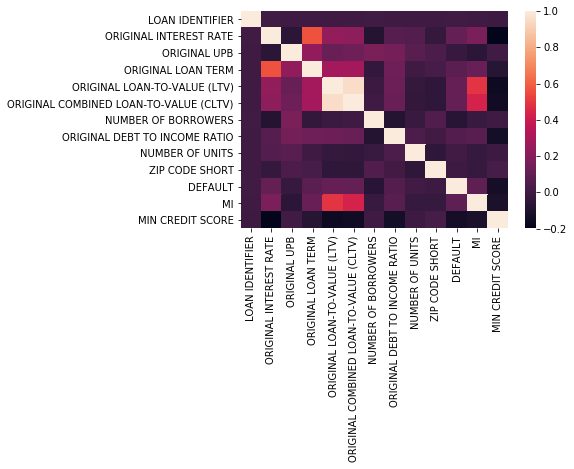

In [139]:
sns.heatmap(full.corr())

In [ ]:
from sklearn.lin